len connection : 5
sommets du graph [(10.0, 10.0), (10.0, 20.0), (20.0, 10.0), (20.0, 20.0)]
sommets du Steiner [(17.113248654051873, 15.0), (12.886751345948127, 15.0)]
connection : [[(20.0, 20.0), (17.113248654051873, 15.0)], [(17.113248654051873, 15.0), (20.0, 10.0)], [(17.113248654051873, 15.0), (12.886751345948127, 15.0)], [(12.886751345948127, 15.0), (10.0, 10.0)], [(12.886751345948127, 15.0), (10.0, 20.0)]]


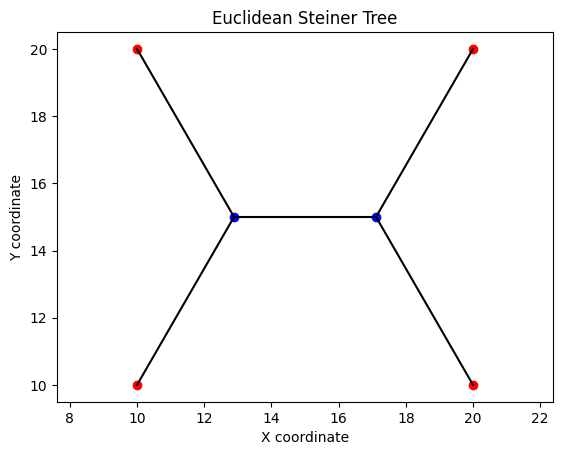

[[(20.0, 20.0), (17.113248654051873, 15.0)],
 [(17.113248654051873, 15.0), (20.0, 10.0)],
 [(17.113248654051873, 15.0), (12.886751345948127, 15.0)],
 [(12.886751345948127, 15.0), (10.0, 10.0)],
 [(12.886751345948127, 15.0), (10.0, 20.0)]]

In [5]:
from EST2D import EST2D

estprob = EST2D("square.tsp")
estprob.solve()
# estprob.draw()
estprob.plot_steiner_tree()
estprob.distance
estprob.connections


len connection : 7
sommets du graph [(10.0, 10.0), (10.0, 20.0), (20.0, 10.0), (20.0, 20.0), (30.0, 15.0)]
sommets du Steiner [(21.59425206027175, 16.12615668611487), (18.91110559281654, 12.64588418852379), (12.68314646745521, 13.48027249759109)]
connection : [[(30.0, 15.0), (21.59425206027175, 16.12615668611487)], [(21.59425206027175, 16.12615668611487), (18.91110559281654, 12.64588418852379)], [(18.91110559281654, 12.64588418852379), (20.0, 10.0)], [(18.91110559281654, 12.64588418852379), (12.68314646745521, 13.48027249759109)], [(12.68314646745521, 13.48027249759109), (10.0, 10.0)], [(12.68314646745521, 13.48027249759109), (10.0, 20.0)], [(21.59425206027175, 16.12615668611487), (20.0, 20.0)]]


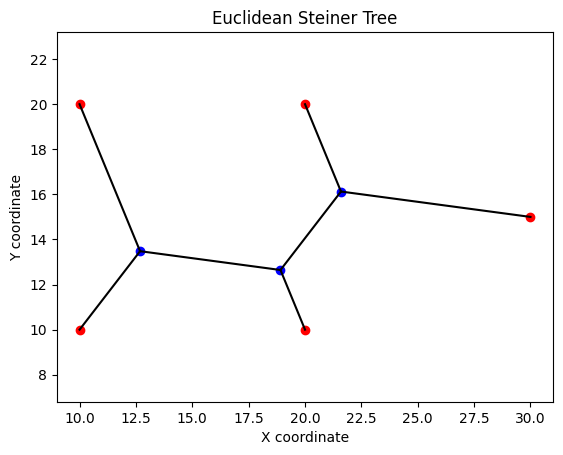

[[(30.0, 15.0), (21.59425206027175, 16.12615668611487)],
 [(21.59425206027175, 16.12615668611487),
  (18.91110559281654, 12.64588418852379)],
 [(18.91110559281654, 12.64588418852379), (20.0, 10.0)],
 [(18.91110559281654, 12.64588418852379),
  (12.68314646745521, 13.48027249759109)],
 [(12.68314646745521, 13.48027249759109), (10.0, 10.0)],
 [(12.68314646745521, 13.48027249759109), (10.0, 20.0)],
 [(21.59425206027175, 16.12615668611487), (20.0, 20.0)]]

In [2]:
from EST2D import EST2D

estprob = EST2D("penta.tsp")
estprob.solve()
# estprob.draw()
estprob.plot_steiner_tree()
estprob.distance
estprob.connections